In [5]:
from torch.utils.data import DataLoader, TensorDataset
import torchvision
from torchvision.transforms import ToTensor, Lambda
from torchvision import datasets
from torchvision import datasets, transforms
import torch
import copy
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy as np
import math

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [7]:
from torchvision.transforms import ToTensor
from torchvision import datasets

# Update the path to where you've manually placed the EMNIST dataset
data = "C:\\Users\\halil\\Documents\\GitHub\\handwritten-letter-recognition-model\\data"  # Change this to the actual path

train_data = datasets.EMNIST(
    root=data,
    split="letters",
    train=True,
    transform=ToTensor(),
    download=False,  # Set to False since you already downloaded it
)

test_data = datasets.EMNIST(
    root=data,
    split="letters",
    train=False,
    transform=ToTensor(),
    download=False,  # Set to False since you already downloaded it
)


In [8]:
len(train_data)+len(test_data)

145600

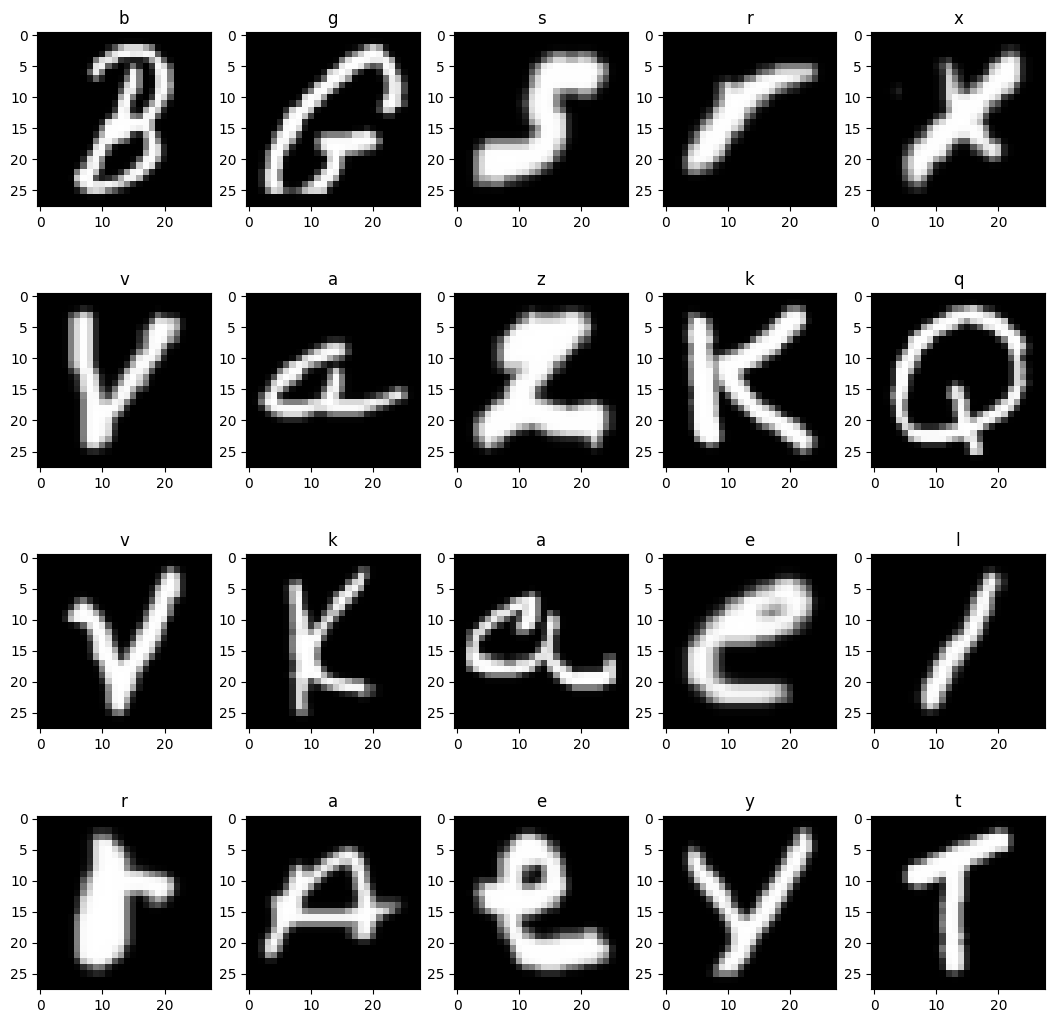

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt

image_list, label_list= [], []
for i in range(20):
  number = random.randint(0,len(train_data))
  image, label = train_data[number]
  image_list.append(image)
  label_list.append(label)

fig, axs = plt.subplots(4, 5, figsize=(13, 13))  # Create a subplot with 4 rows and 5 columns
for i, img in enumerate(image_list):  # Loop over the augmented images
    ax = axs[i // 5, i % 5]  # Determine the row and column number for each subplot
    label_name = [k for k, v in train_data.class_to_idx.items() if v == label_list[i]][0]  # Get the class name
    ax.set_title(label_name)  # Set the title for the current subplot
    ax.imshow(np.array(img).squeeze().T, cmap='gray')  # Plot the image  
plt.show()

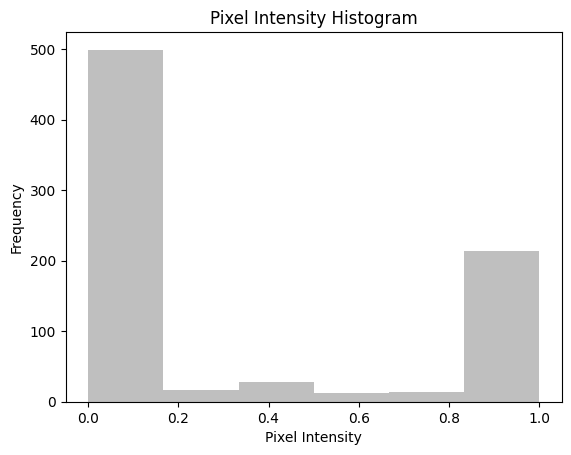

In [10]:
import torch
from torch import nn

# Get an example image and a label.
image, label = train_data[0]

# Flattened the image so we can get the values in a single 1d matrix.
flatten_image = nn.Flatten()
image_flattened = flatten_image(image)

# Creating a histogram to check the mean of the background and foreground.
hist, bin_edges, number_of_x_values= plt.hist(image_flattened, bins=6, color='gray', alpha=0.5)
plt.title('Pixel Intensity Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [11]:
# We can calculate back to 784 and check if the histogram is correct.
total_weight = np.sum(hist)

# The sum of the values varying to their intensity levels.
for i in range(len(bin_edges)-1):
  print(hist[i])

# Weight values calculated for self-picked value of 0-1 to background and the rest for foreground.
Wb = (hist[0]+hist[1])/total_weight
Wf = (hist[2]+hist[3]+hist[4]+hist[5])/total_weight

# Calculating the mean variance of the background and foreground values which we self picked before hand.
Ub = ((hist[0]*bin_edges[0])+(hist[1]*bin_edges[1]))/(hist[0]+hist[1])
Uf = ((hist[2]*bin_edges[2])+(hist[3]*bin_edges[3])+(hist[4]*bin_edges[4])+(hist[5]*bin_edges[5]))/(hist[2]+hist[3]+hist[4]+hist[5])

# Getting the variance value based on Otsu's Method to get a number if our self picked number's variance is the best.
variance = math.sqrt((Wb*Wf)*((Ub-Uf)*(Ub-Uf)))

print(f"\nThe threshold we got from the self picked values is {variance}")
print(f"\nThe weight values are: {Wb}, {Wf}")
print(f"\nThe mean intensity values are: {Ub}, {Uf}")

499.0
17.0
28.0
13.0
14.0
213.0

The threshold we got from the self picked values is 0.35608916720360556

The weight values are: 0.6581632653061225, 0.34183673469387754

The mean intensity values are: 0.005490956235994664, 0.7562188917576377


In [12]:
import numpy as np
def threshold_image(im,th):
    thresholded_im = np.zeros(im.shape)
    thresholded_im[im >= th] = 1
    return thresholded_im

In [13]:
im_otsu = threshold_image(image, variance)

Text(0.5, 1.0, "After Otsu's model")

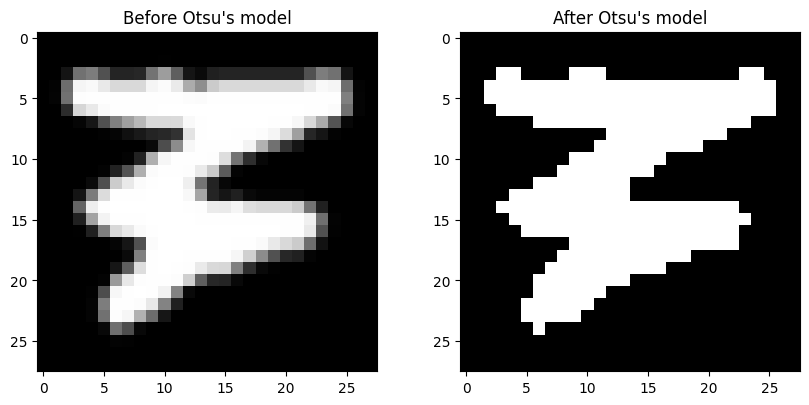

In [14]:

plt.figure(figsize=(10,15))
plt.subplot(321); plt.imshow(image.squeeze(),cmap='gray')
plt.title("Before Otsu's model")
plt.subplot(322); plt.imshow(im_otsu.squeeze(),cmap='gray')
plt.title("After Otsu's model")
     

In [51]:
train_data.classes, len(train_data.classes)

(['N/A',
  'a',
  'b',
  'c',
  'd',
  'e',
  'f',
  'g',
  'h',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'p',
  'q',
  'r',
  's',
  't',
  'u',
  'v',
  'w',
  'x',
  'y',
  'z'],
 27)

In [52]:
train_data.class_to_idx

{'N/A': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [53]:
letterCategories = train_data.classes[1:]

labels = copy.deepcopy(train_data.targets)-1 

print(torch.sum(labels==0))

torch.unique(labels)

tensor(4800)


tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25])

In [54]:
BATCH_SIZE = 32


train_dataloader = DataLoader(train_data, #Dataset to iterate on for the according batch size.
                              batch_size = BATCH_SIZE, #Size of every single iteration.
                              shuffle = True, #To make the loaded data selected randomly.
                              )
test_dataloader = DataLoader(test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = True)

print(f"For training data there is {len(train_dataloader)} iterations with the batch size of {BATCH_SIZE}.")
print(f"For testing data there is {len(test_dataloader)} iterations with the batch size of {BATCH_SIZE}.")

For training data there is 3900 iterations with the batch size of 32.
For testing data there is 650 iterations with the batch size of 32.


In [65]:
import torch
from torch import nn
import torch.nn.functional as F

class LetterRecognizerModel2(nn.Module):
    def __init__(self, input_size, output_size):
        super(LetterRecognizerModel2, self).__init__()
        
        self.conv_layers = nn.Sequential(
            nn.Conv2d(input_size, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.55),
            
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.55),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.55)
        )
        
        self.fc_layers = nn.Sequential(
            nn.Linear(128*3*3, 512),
            #nn.BatchNorm4d(512),
            nn.Dropout(0.25),
            
            nn.Linear(512, 256),
            #nn.BatchNorm4d(256),
            nn.Dropout(0.55),
            
            nn.Linear(256, output_size)
        )
        
    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)  # Flatten the output
        x = self.fc_layers(x)
        return x

torch.manual_seed(42)

model_4 = LetterRecognizerModel2(input_size=1, output_size=len(train_data.classes)).to(device)

model_4


LetterRecognizerModel2(
  (conv_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Dropout(p=0.55, inplace=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (13): Dropout(p=0.55, inplace=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU()
    (16): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1)

In [66]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),
                             lr=0.001)

In [67]:
def accuracy_func(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [68]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time
# Imported from learnpytorch.io directly...

In [69]:
def train_part(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_func,
               device: torch.device = device):
  train_loss, train_acc = 0 , 0
  model.to(device)

  for batch, (X,y) in enumerate(data_loader):
    X, y = X.to(device) , y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_func(y_true=y,
                               y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss is:{train_loss:.5f}, Train accuracy is:{train_acc:.2f}%")
  return train_loss, train_acc

def test_part(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_func,
               device: torch.device = device):
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:

      X, y = X.to(device), y.to(device)

      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_func(y_true=y,
                                y_pred = test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Test loss is:{test_loss:.6f}, Test accuracy is:{test_acc:.6f}%")
  return test_loss, test_acc

In [70]:
from tqdm.auto import tqdm

torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_3 = timer()

train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Train and test model
epochs = 50
for epoch in tqdm(range(epochs)):

    train_loss, train_acc = train_part(data_loader=train_dataloader,
        model=model_4,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_func=accuracy_func,
        device=device)
    test_loss, test_acc = test_part(data_loader=test_dataloader,
        model=model_4,
        loss_fn=loss_fn,
        optimizer = optimizer,
        accuracy_func=accuracy_func,
        device=device)
    train_losses.append(train_loss.detach().cpu().numpy())
    train_accuracies.append(train_acc)
    test_losses.append(test_loss.detach().cpu().numpy())
    test_accuracies.append(test_acc)


    print(f"Epoch: {epoch}\n---------")

train_time_end_model_3 = timer()
total_train_time_model_3 = print_train_time(start=train_time_start_model_3,
                                           end=train_time_end_model_3,
                                           device=device)

  0%|          | 0/50 [00:00<?, ?it/s]

Train loss is:2.08152, Train accuracy is:38.02%
Test loss is:0.834913, Test accuracy is:75.552885%
Epoch: 0
---------
Train loss is:0.43139, Train accuracy is:86.01%
Test loss is:0.310548, Test accuracy is:89.894231%
Epoch: 1
---------
Train loss is:0.27251, Train accuracy is:91.10%
Test loss is:0.250842, Test accuracy is:91.831731%
Epoch: 2
---------
Train loss is:0.22626, Train accuracy is:92.56%
Test loss is:0.225933, Test accuracy is:92.620192%
Epoch: 3
---------
Train loss is:0.20161, Train accuracy is:93.25%
Test loss is:0.214642, Test accuracy is:92.918269%
Epoch: 4
---------
Train loss is:0.18373, Train accuracy is:93.84%
Test loss is:0.208333, Test accuracy is:93.211538%
Epoch: 5
---------
Train loss is:0.17062, Train accuracy is:94.23%
Test loss is:0.197314, Test accuracy is:93.500000%
Epoch: 6
---------
Train loss is:0.15977, Train accuracy is:94.58%
Test loss is:0.189234, Test accuracy is:93.576923%
Epoch: 7
---------
Train loss is:0.15076, Train accuracy is:94.82%
Test los

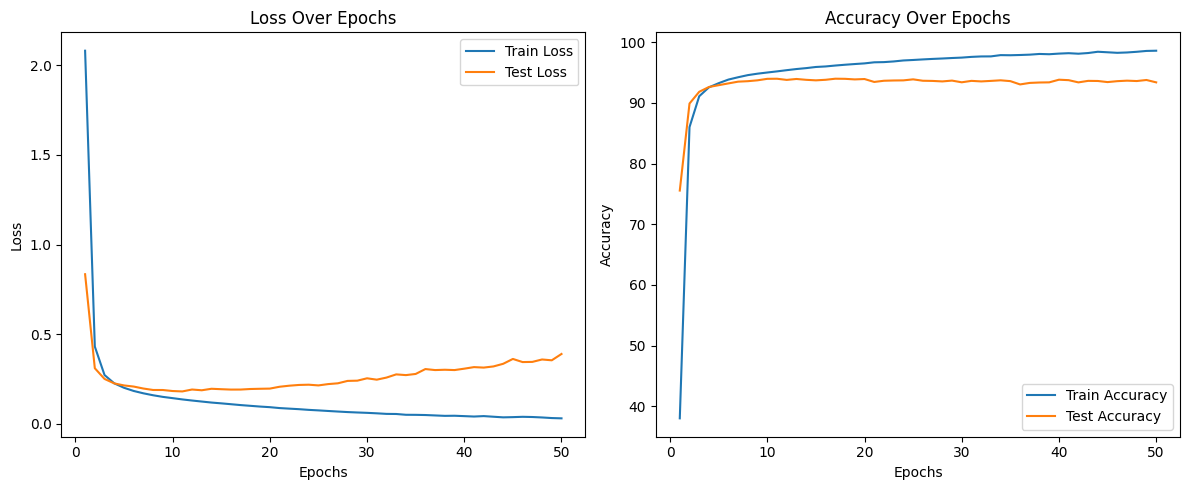

In [71]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()